# Sympy

SymPy is a Python library for performing symbolic computation. It is a computer algebra system (CAS) that can be used either as a standalone application, as a library to other applications. Its live session is also available at https://live.sympy.org/. Since it is a pure Python library, it can be used as interactive mode and as a programmatic application. SymPy has now become a popular symbolic library for the scientific Python ecosystem.


Some of the areas of applications of SymPy are −

    Polynomials
    Calculus
    Discrete maths
    Matrices
    Geometry
    Plotting
    Physics
    Statistics
    Combinatorics


Symbolic computation refers to development of algorithms for manipulating mathematical expressions and other mathematical objects. Symbolic computation integrates mathematics with computer science to solve mathematical expressions using mathematical symbols. A Computer Algebra System (CAS) such as SymPy evaluates algebraic expressions exactly (not approximately) using the same symbols that are used in traditional manual method. For example, we calculate square root of a number using Python's math module as given below 

In [28]:
#standard computation in Python
import math 
print (math.sqrt(25), math.sqrt(7))


5.0 2.6457513110645907


In [29]:
#and in Sympy:

from sympy import *
sqrt(7)


    

In [30]:
#Something more complex:

from sympy import * 
x=Symbol ('x') 
expr = integrate(x**x, x) 
expr


# Equations:

Let's see something more relevant. How to specify equation and how to calculate the solution to an equation:


In [31]:
from sympy import * 
x,y=symbols('x y') 
Eq(x,y)

In [32]:
#different form
Eq(x-y,0)

## solving an equation in one variable

In [33]:
solveset(Eq(x**2-9,0), x)

## Multiple variables

In [34]:
from sympy import * 
x,y=symbols('x y') 
linsolve([Eq(x-y,4),Eq( x + y ,1) ], (x, y))

In [35]:
from sympy import * 
x,y,z=symbols('x y z') 
linsolve([Eq(x-y+z,4),Eq( x + y-z ,1),Eq( x + 2*y +z ,1) ], (x, y, z ))

The linsolve() function can also solve linear equations expressed in matrix form.

In [36]:
a,b=symbols('a b') 
a=Matrix([[1,-1],[1,1]]) 
b=Matrix([4,1]) 
linsolve([a,b], (x,y))

# Limits

SymPy can compute symbolic limits with the limit function. The syntax to compute

$\lim_{x\to x_0} f(x)$

is limit(f(x), x, x0).

In [37]:
#Example 1

limit(sin(x)/x, x, 0)

limit should be used instead of subs whenever the point of evaluation is a singularity. Even though SymPy has objects to represent ∞, using them for evaluation is not reliable because they do not keep track of things like rate of growth. Also, 
things like ∞−∞ and ∞∞ return nan (not-a-number). For example

In [38]:
expr = x**2/exp(x)

expr.subs(x, oo)


limit(expr, x, oo)
0


To evaluate a limit at one side only, pass '+' or '-' as a fourth argument to limit

In [39]:
limit(1/x, x, 0, '+')

In [40]:
limit(1/x, x, 0, '-')

# Derivatives and Integrals


of course Sympy can calculate derivatives for you, for example

In [41]:
from sympy import *

x, y, z = symbols('x y z')

init_printing(use_unicode=True)

In [42]:
diff(cos(x), x)


In [43]:
diff(exp(x**2), x)
    


diff can take multiple derivatives at once. To take multiple derivatives, pass the variable as many times as you wish to differentiate, or pass a number after the variable. For example, both of the following find the third derivative of $𝑥^4$.

In [44]:
diff(x**4, x, x, x)
#24⋅x

or

In [45]:
diff(x**4, x, 3)
#24⋅x

You can also take derivatives with respect to many variables at once. Just pass each derivative in order, using the same syntax as for single variable derivatives. For example, each of the following will compute 

$\frac{\partial^7}{\partial x\partial y^2\partial z^4} e^{x y z}$

In [46]:
expr = exp(x*y*z)

diff(expr, x, y, y, z, z, z, z)

To compute an integral, use the integrate function. There are two kinds of integrals, definite and indefinite. To compute an indefinite integral, that is, an antiderivative, 
or primitive, just pass the variable after the expression.

In [47]:
integrate(cos(x), x)

In [48]:
integrate(exp(-x), (x, 0, oo))

# Plotting

Sympy extends the basic plotting functionalities of Matplotlib to deal with
functions.

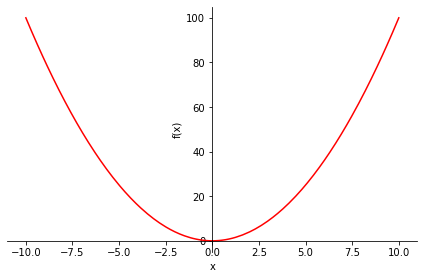

In [49]:
from sympy.plotting import plot 
from sympy import * 
x=Symbol('x') 
plot(x**2, line_color='red')

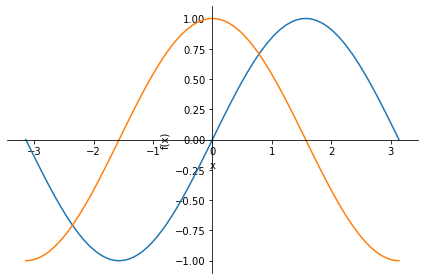

In [50]:
plot( sin(x),cos(x), (x, -pi, pi))

To draw the two functions, each with its own range.

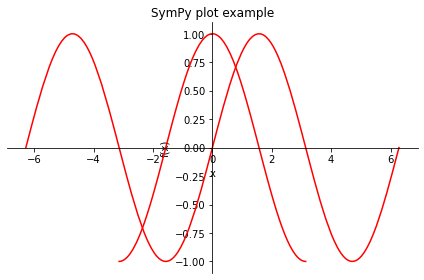

In [51]:
plot( (sin(x),(x, -2*pi, 2*pi)),(cos(x), (x, -pi, pi)), line_color='red', title='SymPy plot example')

To pot a 3D surface plot

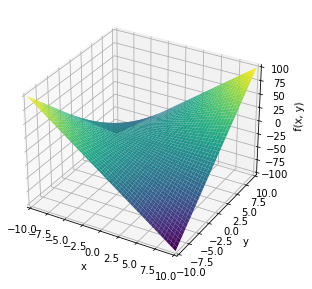

In [52]:
from sympy.plotting import plot3d 
x,y=symbols('x y') 
plot3d(x*y, (x, -10,10), (y, -10,10))

In [53]:
# Plotting a Vector field

import matplotlib.pyplot as plt
import sympy as sp
import numpy as np

sp.init_printing()
x,y = sp.symbols('x y')

def gradient(f):
    return (f.diff(x), f.diff(y))

f = x*y**2
g = gradient(f)
g

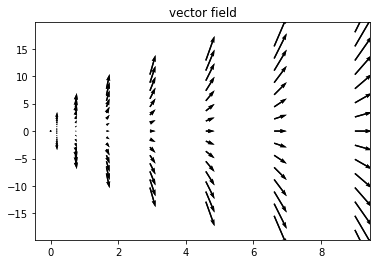

In [54]:
xrange = np.linspace(-3,3,15)
yrange = np.linspace(-3,3,15)
X,Y = np.meshgrid(xrange, yrange)

U=X
V=Y

for i in range(len(xrange)):
    for j in range(len(yrange)):
        x1 = X[i,j]
        y1 = Y[i,j]
        U[i,j] = g[0].subs({x:x1, y:y1})
        V[i,j] = g[1].subs({x:x1, y:y1})

plt.quiver(X,Y,U,V, linewidth=1)
plt.title("vector field")
plt.show()